In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import f_classif, chi2, f_regression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
cols=[*range(1, 75, 1)] #72 es clase
df = pd.read_csv('descriptors_class_influenza.csv', sep=',',usecols=cols)
df.head()

,NumTiny,NumSmall,NumAliphatic,NumAromatic,NumNonPolar,NumPolar,NumCharged,NumBasic,NumAcidic,PorcTiny,...,z3,z4,z5,HydrophobicityIndex,AlphaAndTurnPropensities,BulkyProperties,CompositionalCharacteristicIndex,LocalFlexibility,ElectronicProperties,Class
0,2,4,2,3,6,2,1,1,0,25.000,...,-0.061250,0.018750,-0.046250,-0.093125,-0.210750,0.234625,0.298250,-0.335375,0.209250,1
1,4,6,0,0,3,5,1,1,0,50.000,...,0.526250,-0.357500,-0.190000,-0.219125,-0.360250,-0.601125,-0.515625,0.216875,0.250875,1
2,3,4,2,1,4,4,1,1,0,37.500,...,-0.003750,-0.027500,0.406250,0.076625,-0.376250,0.021375,0.257375,0.322625,0.039875,1
3,3,6,4,0,6,3,0,0,0,33.333,...,-0.462222,-0.668889,0.240000,-0.124333,0.026333,-0.225778,0.744667,-0.097889,0.031889,1
4,3,4,4,2,8,1,0,0,0,33.333,...,-0.501111,-0.572222,-0.053333,0.516000,-0.107222,0.110444,0.923889,-0.160222,-0.062444,1


In [5]:
label_encoder = preprocessing.LabelEncoder() #Encode target labels with value between 0 and n_classes-1. Para valores str
df['Class']= label_encoder.fit_transform(df['Class']) #Fit label encoder and return encoded labels.
print(df['Class'])
df

0       1
1       1
2       1
3       1
4       1
       ..
4563    0
4564    0
4565    0
4566    0
4567    0
Name: Class, Length: 4568, dtype: int64


,NumTiny,NumSmall,NumAliphatic,NumAromatic,NumNonPolar,NumPolar,NumCharged,NumBasic,NumAcidic,PorcTiny,...,z3,z4,z5,HydrophobicityIndex,AlphaAndTurnPropensities,BulkyProperties,CompositionalCharacteristicIndex,LocalFlexibility,ElectronicProperties,Class
0,2,4,2,3,6,2,1,1,0,25.000,...,-0.061250,0.018750,-0.046250,-0.093125,-0.210750,0.234625,0.298250,-0.335375,0.209250,1
1,4,6,0,0,3,5,1,1,0,50.000,...,0.526250,-0.357500,-0.190000,-0.219125,-0.360250,-0.601125,-0.515625,0.216875,0.250875,1
2,3,4,2,1,4,4,1,1,0,37.500,...,-0.003750,-0.027500,0.406250,0.076625,-0.376250,0.021375,0.257375,0.322625,0.039875,1
3,3,6,4,0,6,3,0,0,0,33.333,...,-0.462222,-0.668889,0.240000,-0.124333,0.026333,-0.225778,0.744667,-0.097889,0.031889,1
4,3,4,4,2,8,1,0,0,0,33.333,...,-0.501111,-0.572222,-0.053333,0.516000,-0.107222,0.110444,0.923889,-0.160222,-0.062444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,3,7,4,2,7,7,3,2,1,21.429,...,0.037143,0.110714,0.539286,-0.342429,0.187500,-0.113071,0.126786,0.189286,-0.207571,0
4564,4,7,5,1,10,4,2,0,2,28.571,...,0.532143,-0.359286,0.254286,0.307143,0.246857,-0.148643,0.133071,0.201500,-0.344643,0
4565,3,10,6,0,8,6,2,1,1,21.429,...,-0.412857,-0.799286,0.533571,-0.399286,-0.247786,-0.189714,0.559857,0.059643,0.019071,0
4566,1,3,4,2,8,6,5,4,1,7.143,...,-1.190000,0.330000,-0.137143,-0.190143,0.221000,0.416929,0.145714,-0.234143,0.548714,0


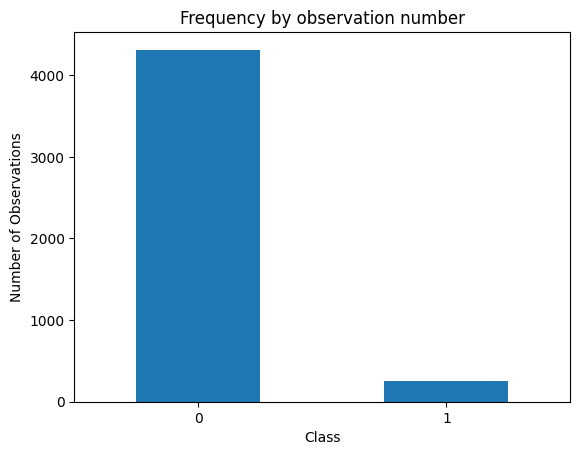

In [6]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");


In [7]:
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
X=df[feature_cols]
Y=df.Class
Y=df.Class
X_p=preprocessing.normalize(X)

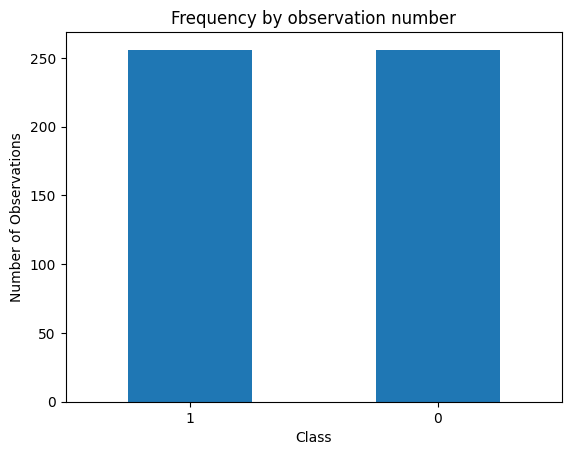

In [8]:
df2=df.iloc[np.random.random_integers(256,4312,256),0:74] #0:62
df3=df.iloc[0:256,0:74] #0:62
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
Yrandom=df4.Class
X_prandom=preprocessing.normalize(Xrandom)
count_classes = Yrandom.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");


In [229]:
V_range = list(range(1, 101))
t_range = list(range(0,4))
print(t_range)
t_velues=[10,100,1000,10000]
t_scores=[0]
for j in t_range:
    Acc = []
    Rec = []
    Pre = []
    print(j)
    print(t_velues[j])
    for k in V_range:
        X_train, X_test, y_train, y_test = train_test_split(X_prandom,Yrandom, test_size=0.20)#,random_state=123)
        RF=RandomForestClassifier(n_estimators=t_velues[j])#,class_weight="balanced")
        RF.fit(X_train,y_train)
        y_pred = RF.predict(X_test)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        #print(confusion_matrix(y_test,y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    t_scores.append(np.mean(Rec))
    print('---------------------------------------------------')
    print(" Accuracy: ", np.mean(Acc),"STD",np.std(Acc))
    print(" Recall: ", np.mean(Rec),"STD",np.std(Rec))
    print(" Precisión: ", np.mean(Pre),"STD",np.std(Pre))
    print('---------------------------------------------------')

[0, 1, 2, 3]
0
10
---------------------------------------------------
 Accuracy:  0.666116504854369 STD 0.04313335576429352
 Recall:  0.598815506453157 STD 0.07310588828926012
 Precisión:  0.6892989504700888 STD 0.0684054925349187
---------------------------------------------------
1
100
---------------------------------------------------
 Accuracy:  0.7203883495145632 STD 0.038980310485213054
 Recall:  0.7225423380543945 STD 0.06127830710531659
 Precisión:  0.7250132612037841 STD 0.06537121978863737
---------------------------------------------------
2
1000
---------------------------------------------------
 Accuracy:  0.7193203883495145 STD 0.04158004317667358
 Recall:  0.7268843784322295 STD 0.06570644099438012
 Precisión:  0.7165497341473128 STD 0.06963780290554542
---------------------------------------------------
3
10000
---------------------------------------------------
 Accuracy:  0.7144660194174758 STD 0.04112415536164469
 Recall:  0.7212330067970782 STD 0.05900551994660107

[0, 0.598815506453157, 0.7225423380543945, 0.7268843784322295, 0.7212330067970782]
[10, 100, 1000, 10000]


Text(0, 0.5, 'Recall')

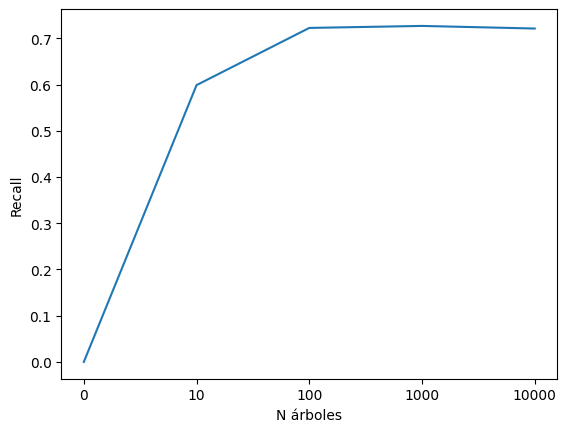

In [230]:
print(t_scores)
print(t_velues)
t_velues3=['0','10','100','1000','10000']
plt.plot(t_velues3,t_scores)
plt.xlabel('N árboles')
plt.ylabel('Recall')

SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.5011650485436894, 0.6202912621359223, 0.7256310679611652, 0.6077669902912621] [0.06597342772798498, 0.04615266849816345, 0.046695294846960375, 0.05719097660203163]
[0.43064247940198064, 0.7128738169024926, 0.7189578344601071, 0.5562224694443402] [0.2685082053110237, 0.055141149852852935, 0.0713218233514838, 0.12726009591075618]
[0.4539389294721443, 0.6049448465559537, 0.7281296276401065, 0.633911762215672] [0.17590338841523948, 0.05885141722981718, 0.06586219028833579, 0.08456256097897735]


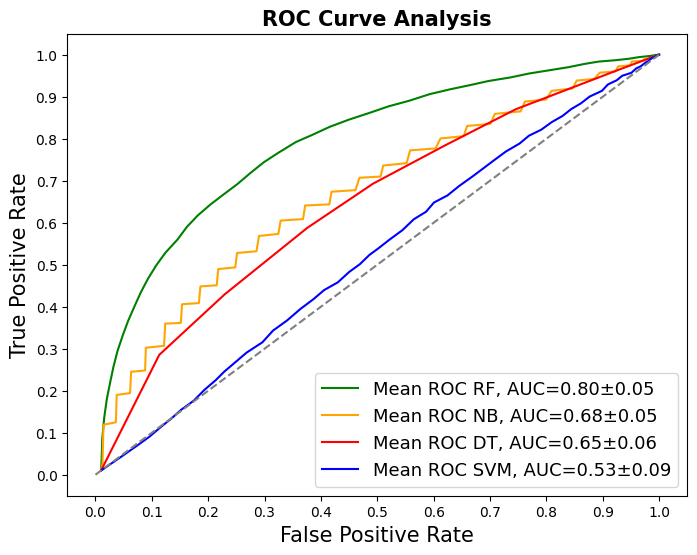

In [17]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(var_smoothing=1e-9),
               RandomForestClassifier(random_state=123),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
#feature_coll = ['at_hmoment_sheet','PartialSpecificVolume','st7','Blosum4','PorcAromatic','DoubleBendPreference','t2',
#               'at_hmoment_alpha','AlphaAndTurnPropensities','Blosum8','HelixBendPreference','t3','at_boman','st3',
#               'PorcAcidic','MsWhim3','PorcSmall','PorcCharged','MsWhim1','Blosum2','Blosum10','t4','OccurrenceInAlphaRegion',
#               'pKC','Blosum3','z3','LocalFlexibility','st2','PorcTiny','t5','Hidrophobicity','CompositionalCharacteristicIndex',
#               'Blosum5','Blosum7','Blosum9','ElectronicProperties','z1','Blosum6','z4','z2','st5','Blosum1','SideChainSize','t1',
#               'SurroundingHidrophobicity','PorcNonPolar','PorcPolar']
graph_acc = []
Acc = []
Rec = []
Pre = []
acc = []
rec = []
pre = []
acc_std = []
rec_std = []
pre_std = []
Std = []
Mean = []
Fpr = []
Tpr = []
Auc = []
Auc2 = []
Auc3 = []
Auc4 = []
fc = []
mean_tpr=[]
W_range = list(range(0, 100))
X_range = list(range(0, 400, 100))
Y_range = list(range(0, 100,1))

for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:
        fpr_all=[]
        tpr_all=[]
        df2=df.iloc[np.random.random_integers(256,4312,256),0:74] #0:62
        df3=df.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[feature_cols]
        Y_r=df4.Class
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)
        model = cls.fit(X_train, y_train)
        #print(cls.predict(X))
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   
##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)
fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix2,axis=1)
std_tpr_svm = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix2,axis=1)
std_tpr_nb = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix2,axis=1)
std_tpr_rf = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix2,axis=1)
std_tpr_dt = np.std(matrix2,axis=1)
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_NegEpiScript_AllDescriptors.png')
plt.show()

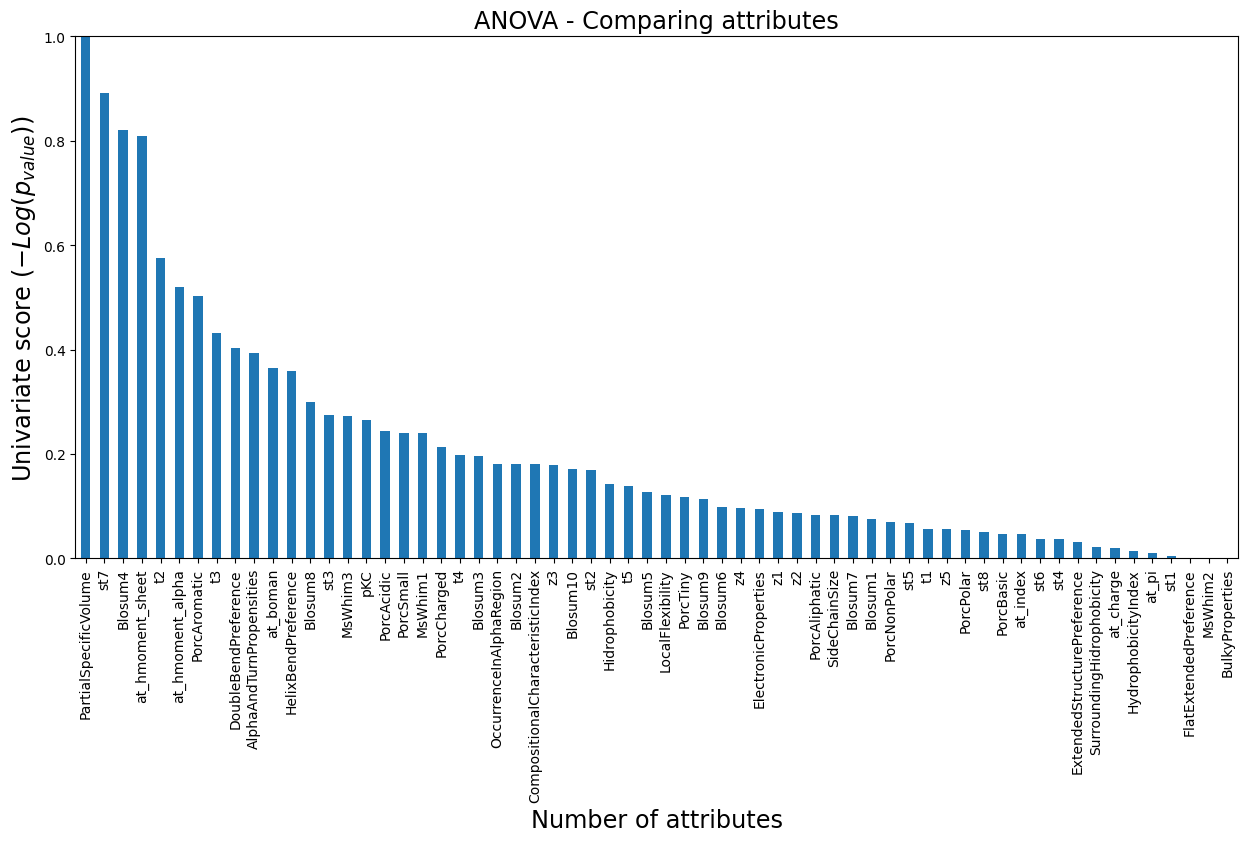

0.03705434620769424
['PartialSpecificVolume', 'st7', 'Blosum4', 'at_hmoment_sheet', 't2', 'at_hmoment_alpha', 'PorcAromatic', 't3', 'DoubleBendPreference', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 'Blosum8', 'st3', 'MsWhim3', 'pKC', 'PorcAcidic', 'PorcSmall', 'MsWhim1', 'PorcCharged', 't4', 'Blosum3', 'OccurrenceInAlphaRegion', 'Blosum2', 'CompositionalCharacteristicIndex', 'z3', 'Blosum10', 'st2', 'Hidrophobicity', 't5', 'Blosum5', 'LocalFlexibility', 'PorcTiny', 'Blosum9', 'Blosum6', 'z4', 'ElectronicProperties', 'z1', 'z2', 'PorcAliphatic', 'SideChainSize', 'Blosum7', 'Blosum1', 'PorcNonPolar', 'st5', 't1', 'z5', 'PorcPolar', 'st8', 'PorcBasic', 'at_index', 'st6', 'st4', 'ExtendedStructurePreference', 'SurroundingHidrophobicity', 'at_charge', 'HydrophobicityIndex', 'at_pi', 'st1', 'FlatExtendedPreference', 'MsWhim2', 'BulkyProperties']


In [19]:
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
X=df[feature_cols]
Y=df.Class
X_p=preprocessing.normalize(X)
V_range = list(range(0, 62))
asel = SelectKBest(f_classif, k='all')
asel.fit(X_p,Y)
scores = asel.scores_[asel.get_support()]
total_f_reg=-np.log10(asel.pvalues_)
total_f_reg /= total_f_reg.max()
names_scores = list(zip(feature_cols, total_f_reg))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_reg_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_reg_Scores', 'Feat_names'], ascending = [False, True])
X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(15, 9))
#print(list(ns_df_sorted['F_reg_Scores']))
#print(list(ns_df_sorted['Feat_names']))

plt.xticks(X_indices,ns_df_sorted['Feat_names'],rotation=90)
plt.bar(X_indices, ns_df_sorted['F_reg_Scores'], label="Regression($-Log(p_{value})$)",width=0.5)
#plt.axhline(y=0.05, xmin=0.0, xmax=3.5, color='red')
plt.title("ANOVA - Comparing attributes",fontsize='xx-large')
plt.xlabel("Number of attributes",fontsize='xx-large')
plt.ylabel("Univariate score ($-Log(p_{value})$)",fontsize='xx-large')

plt.subplots_adjust(bottom=0.3)
plt.margins(0.005)
plt.ylim(0, 1)
plt.savefig('ANOVA_NegEpi_Script.png')#,pad_inches=1.5)
plt.show()

print(ns_df_sorted['F_reg_Scores'][41])
print(list(ns_df_sorted['Feat_names']))

In [20]:
print(list(ns_df_sorted['Feat_names'][0:20]))

['PartialSpecificVolume', 'st7', 'Blosum4', 'at_hmoment_sheet', 't2', 'at_hmoment_alpha', 'PorcAromatic', 't3', 'DoubleBendPreference', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 'Blosum8', 'st3', 'MsWhim3', 'pKC', 'PorcAcidic', 'PorcSmall', 'MsWhim1', 'PorcCharged']


SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.5545631067961164, 0.6282524271844661, 0.6987378640776698, 0.6033009708737864] [0.0623672876979189, 0.04254809369552529, 0.04250731142024375, 0.05226548238087913]
[0.5454777430758968, 0.7800251368640994, 0.6934494393716405, 0.5503744392142879] [0.2029344488552534, 0.057827733354116416, 0.06596992353601555, 0.12345967526504971]
[0.5386384169091855, 0.5959014325621029, 0.7007153051988699, 0.6155855393478251] [0.13049823733112118, 0.05911475194854758, 0.06883062716467415, 0.07542401682522443]


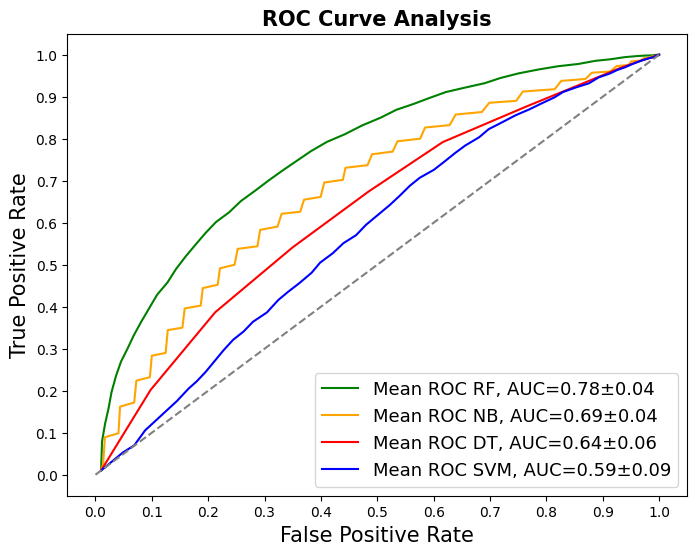

In [40]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(var_smoothing=1e-9),
               RandomForestClassifier(random_state=123),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
feature_coll = ['PartialSpecificVolume', 'st7', 'Blosum4', 'at_hmoment_sheet', 't2', 'at_hmoment_alpha', 'PorcAromatic', 't3', 'DoubleBendPreference', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 'Blosum8', 'st3', 'MsWhim3', 'pKC', 'PorcAcidic', 'PorcSmall', 'MsWhim1', 'PorcCharged']
graph_acc = []
Acc = []
Rec = []
Pre = []
acc = []
rec = []
pre = []
acc_std = []
rec_std = []
pre_std = []
Std = []
Mean = []
Fpr = []
Tpr = []
Auc = []
Auc2 = []
Auc3 = []
Auc4 = []

mean_tpr=[]
W_range = list(range(0, 100))
X_range = list(range(0, 400, 100))
Y_range = list(range(0, 100,1))

for cls in classifiers:
    print(cls)
    for i in W_range:
        fpr_all=[]
        tpr_all=[]
        df2=df.iloc[np.random.random_integers(256,4312,256),0:74]
        df3=df.iloc[0:256,0:74]
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[feature_coll]
        Y_r=df4.Class
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)
        model = cls.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   
##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)
fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix2,axis=1)
std_tpr_svm = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix2,axis=1)
std_tpr_nb = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix2,axis=1)
std_tpr_rf = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix2,axis=1)
std_tpr_dt = np.std(matrix2,axis=1)
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_ANOVANegEpi_script_r256-256.png')
plt.show()

In [26]:
print(*ns_df_sorted['Feat_names'][0:20], sep = ", ")
print(*ns_df_sorted['Feat_names'], sep = "', '")
print(*ns_df_sorted['F_reg_Scores'], sep = ", ")


st7, Blosum4, t2, PartialSpecificVolume, AlphaAndTurnPropensities, at_boman, HelixBendPreference, t3, st2, Blosum3, DoubleBendPreference, MsWhim3, PorcCharged, Blosum5, PorcSmall, z3, st3, CompositionalCharacteristicIndex, SideChainSize, PorcAcidic
st7', 'Blosum4', 't2', 'PartialSpecificVolume', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 't3', 'st2', 'Blosum3', 'DoubleBendPreference', 'MsWhim3', 'PorcCharged', 'Blosum5', 'PorcSmall', 'z3', 'st3', 'CompositionalCharacteristicIndex', 'SideChainSize', 'PorcAcidic', 'z2', 'Hidrophobicity', 'at_hmoment_sheet', 'ElectronicProperties', 'pKC', 't5', 'z5', 'PorcAromatic', 'PorcPolar', 'Blosum8', 'OccurrenceInAlphaRegion', 'PorcBasic', 'at_index', 'PorcAliphatic', 'FlatExtendedPreference', 'at_hmoment_alpha', 'MsWhim2', 'BulkyProperties', 'Blosum7', 'z1', 'LocalFlexibility', 'PorcTiny', 't1', 'z4', 'Blosum10', 'st6', 'Blosum1', 'st8', 'MsWhim1', 't4', 'SurroundingHidrophobicity', 'Blosum6', 'st5', 'at_pi', 'Blosum2', 'Hydroph

['PartialSpecificVolume', 'st7', 'Blosum4', 'at_hmoment_sheet', 't2', 'at_hmoment_alpha', 'PorcAromatic', 't3', 'DoubleBendPreference', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 'Blosum8', 'st3', 'MsWhim3', 'pKC', 'PorcAcidic', 'PorcSmall', 'MsWhim1', 'PorcCharged', 't4', 'Blosum3', 'OccurrenceInAlphaRegion', 'Blosum2', 'CompositionalCharacteristicIndex', 'z3', 'Blosum10', 'st2', 'Hidrophobicity', 't5', 'Blosum5', 'LocalFlexibility', 'PorcTiny', 'Blosum9', 'Blosum6', 'z4', 'ElectronicProperties', 'z1', 'z2', 'PorcAliphatic', 'SideChainSize', 'Blosum7', 'Blosum1', 'PorcNonPolar', 'st5', 't1', 'z5', 'PorcPolar', 'st8', 'PorcBasic', 'at_index', 'st6', 'st4', 'ExtendedStructurePreference', 'SurroundingHidrophobicity', 'at_charge', 'HydrophobicityIndex', 'at_pi', 'st1', 'FlatExtendedPreference', 'MsWhim2', 'BulkyProperties']
range(0, 62)
PartialSpecificVolume
Empty DataFrame
Columns: [PartialSpecificVolume]
Index: []
Empty DataFrame
Columns: [PartialSpecificVolume, st7]

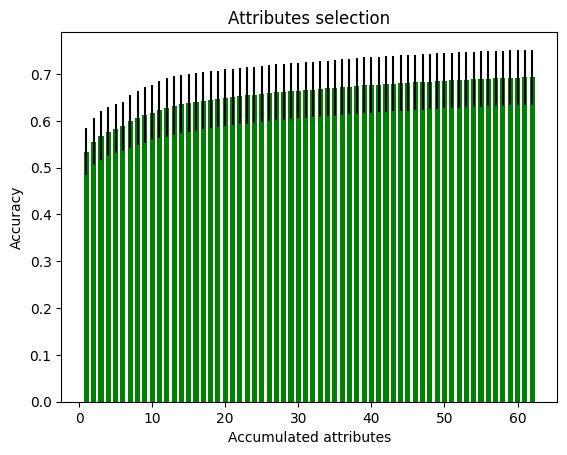

In [24]:
graph_acc=[]
anova = list(ns_df_sorted['Feat_names'])
print(anova)
V_range = range(0, 62) #
print(V_range) #62 1,63*
Acc = []
Rec = []
Pre = []
Std = []
Mean = []
fc = []
print(anova[0])
W_range = range(0, 100)
for k in V_range: #atributos
    fc.append(anova[k])
    print(df[fc].head(0))
    for l in W_range: #10 veces
        X_r=df4[fc] #256:256
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.2)#,random_state=123)
        #X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20,random_state=123)
        RF = RandomForestClassifier(random_state=123,n_estimators=1000)
        RF.fit(X_train, y_train)
        y_pred = RF.predict(X_test)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))
rango=[]
for i in V_range:
    rango.append(i+1)
import matplotlib.pyplot as plot
plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy')
plt.xlabel('Accumulated attributes')
plt.title('Attributes selection')
plt.savefig('Accurracy_ANOVANegEpiScript_r256-256.png')
plt.show()

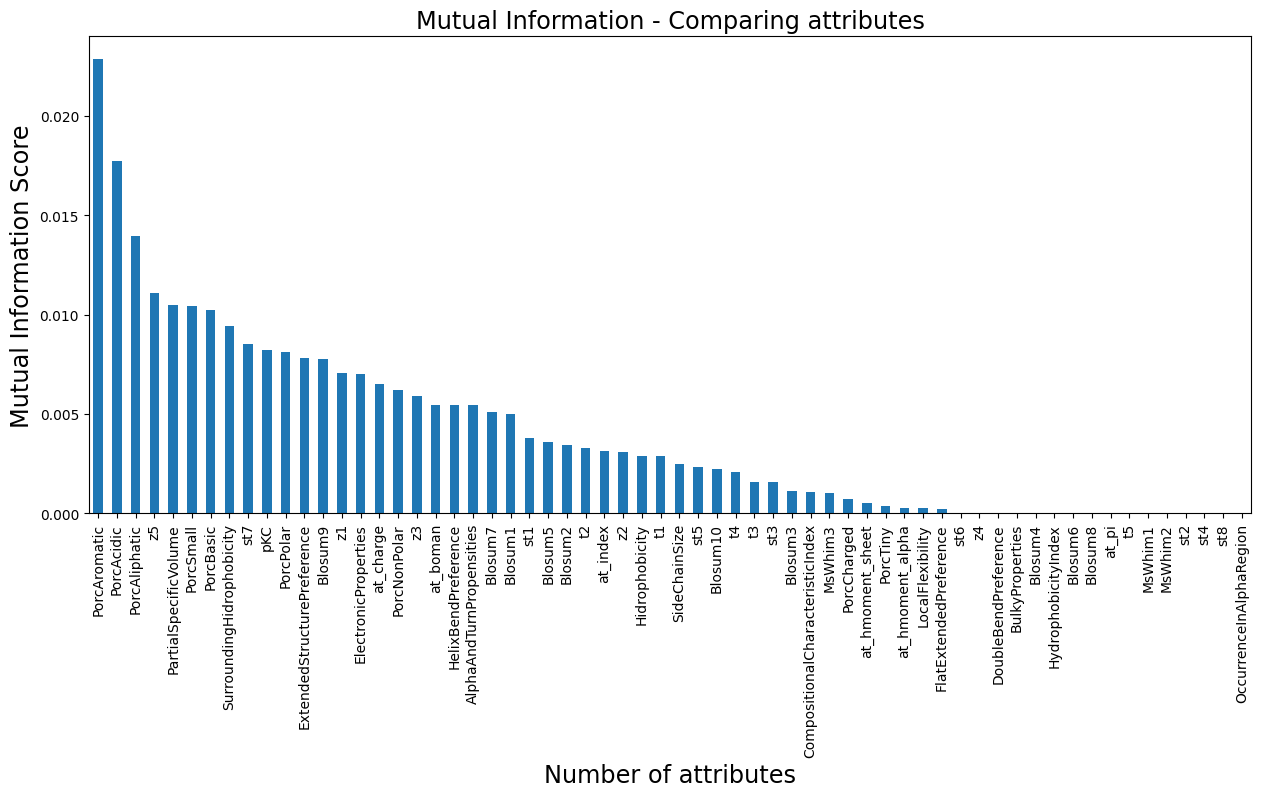

In [25]:
#feature_cols =['at_hmoment_sheet']
#fc =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
#fc  = feature_cols
#X   = df[fc]
#Y   = df.Class

X_train,X_test,y_train,y_test=train_test_split(X_p,Y,test_size=0.2,random_state=123)
mutual_info = mutual_info_classif(X_train, y_train,random_state=123)

mutual_info = pd.Series(mutual_info)
mutual_info.index = feature_cols
mi=mutual_info.sort_values(ascending=False)

mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 9))

#plt.axhline(y=0.05, xmin=0.0, xmax=3.5, color='red')

sel_five_cols = SelectKBest(mutual_info_classif, k='all')
mi=sel_five_cols.fit(X_train, y_train)
mutual_info.index[sel_five_cols.get_support()]
plt.subplots_adjust(bottom=0.35)

plt.title("Mutual Information - Comparing attributes",fontsize='xx-large')
plt.xlabel("Number of attributes",fontsize='xx-large')
plt.ylabel("Mutual Information Score",fontsize='xx-large')
plt.savefig('ml-features-MutualInfo_random256-256_ok.png',pad_inches=1.5)


In [26]:
print(*mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20],sep = ", ")
print(*mutual_info.sort_values(ascending=False))



PorcAromatic, PorcAcidic, PorcAliphatic, z5, PartialSpecificVolume, PorcSmall, PorcBasic, SurroundingHidrophobicity, st7, pKC, PorcPolar, ExtendedStructurePreference, Blosum9, z1, ElectronicProperties, at_charge, PorcNonPolar, z3, at_boman, HelixBendPreference
0.02284323380502018 0.017743967147777262 0.01396967206853117 0.011076374059277194 0.010479071484518432 0.010418181545130967 0.010226841347494187 0.009430954240288614 0.0085127141918524 0.008236868774289752 0.008116716487152509 0.007794701714852081 0.007777158410143814 0.007070087229483102 0.006989047983655405 0.006499986810114322 0.006232495571285801 0.0059147476694403345 0.005460694776704189 0.005460101286432595 0.005454202135617203 0.005085959674929086 0.0050216914627534415 0.003775085533269218 0.0035981966015421474 0.0034429607313837263 0.003273444048152774 0.0031287715241494762 0.003093073951847769 0.0029064735729653624 0.0028762477243926554 0.002469395681295783 0.0023306239465838985 0.0022233714888575395 0.002096954406080931

SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.5535922330097087, 0.6609708737864076, 0.7493203883495144, 0.6349514563106795] [0.06495399591592745, 0.04951798960160019, 0.03963686614135602, 0.05164829544959375]
[0.5171780038933522, 0.7277704573502219, 0.7283406582561747, 0.6314542079506487] [0.20003039315649693, 0.06641384598730286, 0.05578167975346645, 0.12437600802925769]
[0.5408141909998239, 0.6412955346897578, 0.7599368706939593, 0.6433447776342457] [0.14031120904693373, 0.06442302375571701, 0.0647964805729616, 0.08115823549653899]


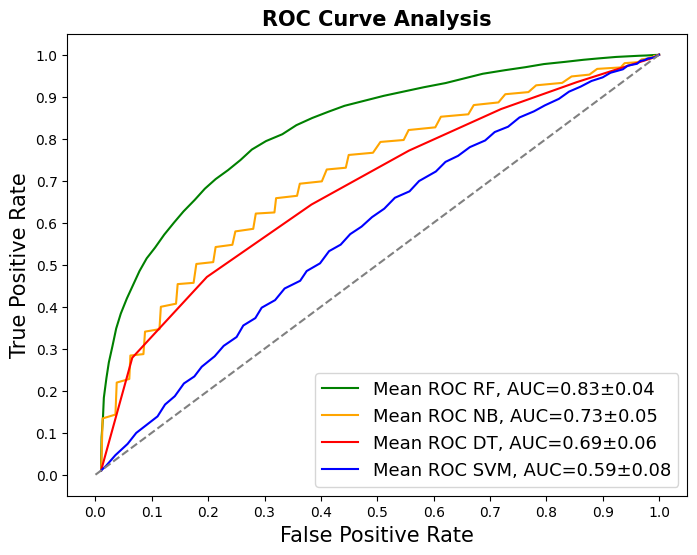

In [27]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(var_smoothing=1e-9),
               RandomForestClassifier(random_state=123),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
feature_coll = list(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20])

graph_acc = [];Acc = [];Rec = [];Pre = [];acc = [];rec = [];
pre = [];acc_std = [];rec_std = [];pre_std = [];Std = [];
Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];mean_tpr=[];

W_range = list(range(0, 100))
X_range = list(range(0, 400, 100))
Y_range = list(range(0, 100,1))
for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:
        fpr_all=[]
        tpr_all=[]
        df2=df.iloc[np.random.random_integers(256,4312,256),0:74] #0:62
        df3=df.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[feature_coll]
        Y_r=df4.Class
        X_rn=preprocessing.normalize(X_r)
        #X_train, X_test, y_train, y_test = train_test_split(Xprandom,Yrandom, test_size=0.2)#,random_state=123)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)
        model = cls.fit(X_train, y_train)
        #print(cls.predict(X))
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   
##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)
fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix2,axis=1)
std_tpr_svm = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix2,axis=1)
std_tpr_nb = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix2,axis=1)
std_tpr_rf = np.std(matrix2,axis=1)
matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)
matrix2=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix2,axis=1)
std_tpr_dt = np.std(matrix2,axis=1)
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_MUTUALINFO-NegEpiScript-r256-256.png')
plt.show()

In [28]:
print(list(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()]))
print(list(mutual_info.sort_values(ascending=False)))
print(list(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20]))

['PorcAromatic', 'PorcAcidic', 'PorcAliphatic', 'z5', 'PartialSpecificVolume', 'PorcSmall', 'PorcBasic', 'SurroundingHidrophobicity', 'st7', 'pKC', 'PorcPolar', 'ExtendedStructurePreference', 'Blosum9', 'z1', 'ElectronicProperties', 'at_charge', 'PorcNonPolar', 'z3', 'at_boman', 'HelixBendPreference', 'AlphaAndTurnPropensities', 'Blosum7', 'Blosum1', 'st1', 'Blosum5', 'Blosum2', 't2', 'at_index', 'z2', 'Hidrophobicity', 't1', 'SideChainSize', 'st5', 'Blosum10', 't4', 't3', 'st3', 'Blosum3', 'CompositionalCharacteristicIndex', 'MsWhim3', 'PorcCharged', 'at_hmoment_sheet', 'PorcTiny', 'at_hmoment_alpha', 'LocalFlexibility', 'FlatExtendedPreference', 'st6', 'z4', 'DoubleBendPreference', 'BulkyProperties', 'Blosum4', 'HydrophobicityIndex', 'Blosum6', 'Blosum8', 'at_pi', 't5', 'MsWhim1', 'MsWhim2', 'st2', 'st4', 'st8', 'OccurrenceInAlphaRegion']
[0.02284323380502018, 0.017743967147777262, 0.01396967206853117, 0.011076374059277194, 0.010479071484518432, 0.010418181545130967, 0.01022684134749

Empty DataFrame
Columns: [PorcAromatic]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic, PorcAliphatic]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic, PorcAliphatic, z5]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic, PorcAliphatic, z5, PartialSpecificVolume]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic, PorcAliphatic, z5, PartialSpecificVolume, PorcSmall]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic, PorcAliphatic, z5, PartialSpecificVolume, PorcSmall, PorcBasic]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic, PorcAliphatic, z5, PartialSpecificVolume, PorcSmall, PorcBasic, SurroundingHidrophobicity]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic, PorcAliphatic, z5, PartialSpecificVolume, PorcSmall, PorcBasic, SurroundingHidrophobicity, st7]
Index: []
Empty DataFrame
Columns: [PorcAromatic, PorcAcidic, PorcAliphatic, z5, Par

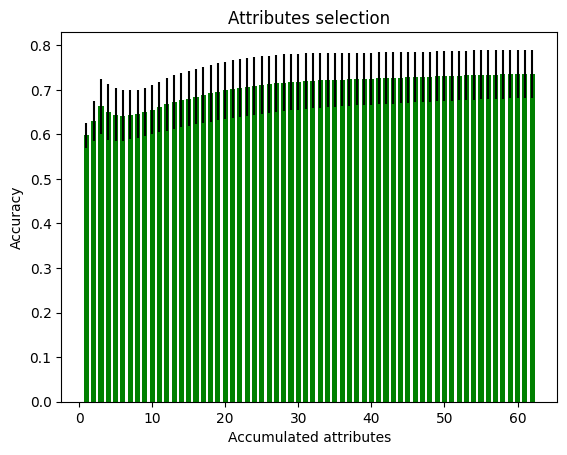

In [32]:
graph_acc=[]
V_range = list(range(0, 62)) 
W_range = list(range(0, 100))
Acc = []
Rec = []
Pre = []
Std = []
Mean = []
fc = []
mutual=list(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()])
#print(list(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()]))
#mutual=['t3', 'PorcAromatic', 'PorcBasic', 'PartialSpecificVolume', 'Blosum1', 'z1', 'st7', 'at_hmoment_sheet', 'PorcAcidic', 'z5', 'AlphaAndTurnPropensities', 'st5', 'PorcAliphatic', 'PorcPolar', 't1', 't2', 'PorcTiny', 'at_boman', 'Blosum9', 'PorcSmall']
for k in V_range: #veces de atributo
    fc.append(mutual[k])
    print(df[fc].head(0))
    for l in W_range:
        X_rn=preprocessing.normalize(X_r)
        df2=df.iloc[np.random.random_integers(256,4312,256),0:74] #0:62
        df3=df.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc]
        Y_r=df4.Class
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20,random_state=123)
        RF=RandomForestClassifier(random_state=123,n_estimators=1000)
        RF.fit(X_train,y_train)
        y_pred = RF.predict(X_test)
        holi=metrics.accuracy_score(y_test, y_pred)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    #print(np.mean(Acc))
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))
rango=[]
#print(graph_acc)
for i in V_range:
    rango.append(i+1)
    
import matplotlib.pyplot as plot

plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy')
plt.xlabel('Accumulated attributes')
plt.title('Attributes selection')
plt.savefig('Accuracy_MutualInfo_RF_significativos-random256-256.png')
plt.show()


In [33]:
print(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()])

Index(['PorcAromatic', 'PorcAcidic', 'PorcAliphatic', 'z5',
       'PartialSpecificVolume', 'PorcSmall', 'PorcBasic',
       'SurroundingHidrophobicity', 'st7', 'pKC', 'PorcPolar',
       'ExtendedStructurePreference', 'Blosum9', 'z1', 'ElectronicProperties',
       'at_charge', 'PorcNonPolar', 'z3', 'at_boman', 'HelixBendPreference',
       'AlphaAndTurnPropensities', 'Blosum7', 'Blosum1', 'st1', 'Blosum5',
       'Blosum2', 't2', 'at_index', 'z2', 'Hidrophobicity', 't1',
       'SideChainSize', 'st5', 'Blosum10', 't4', 't3', 'st3', 'Blosum3',
       'CompositionalCharacteristicIndex', 'MsWhim3', 'PorcCharged',
       'at_hmoment_sheet', 'PorcTiny', 'at_hmoment_alpha', 'LocalFlexibility',
       'FlatExtendedPreference', 'st6', 'z4', 'DoubleBendPreference',
       'BulkyProperties', 'Blosum4', 'HydrophobicityIndex', 'Blosum6',
       'Blosum8', 'at_pi', 't5', 'MsWhim1', 'MsWhim2', 'st2', 'st4', 'st8',
       'OccurrenceInAlphaRegion'],
      dtype='object')


SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.5554368932038835, 0.665145631067961, 0.7587378640776699, 0.6400970873786407] [0.06746413255118719, 0.04886293085639368, 0.042216267186887146, 0.05035934590007558]
[0.5376666953805003, 0.7300168847295702, 0.7381943179884942, 0.6450566948905722] [0.1960205399927974, 0.06985122876149363, 0.06036935622218564, 0.11706263620078998]
[0.5412440888587342, 0.6436833111264925, 0.7761052521490813, 0.6474396755676747] [0.1507948197037572, 0.06605991199483298, 0.07116639761219046, 0.08200443044693094]


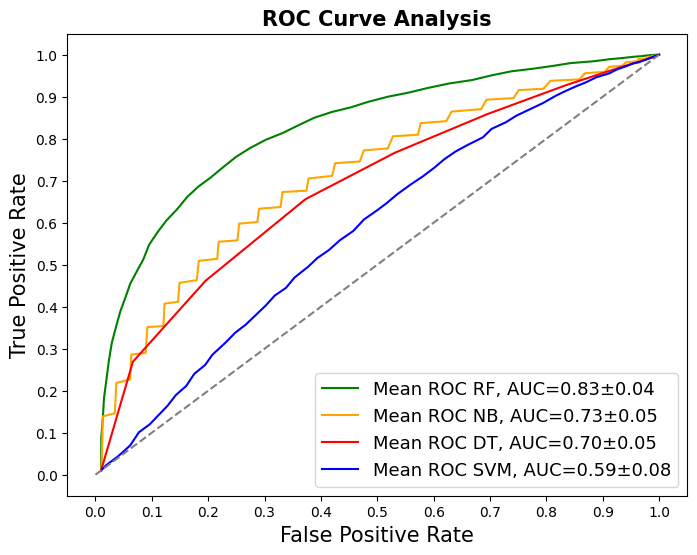

In [34]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(var_smoothing=1e-9),
               RandomForestClassifier(random_state=123),#,n_estimators=1000),#,n_estimators=100,class_weight="balanced"),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
##MUTUALINFO

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];
mean_tpr=[]

W_range = list(range(0, 100))
X_range = list(range(0, 400, 100))
Y_range = list(range(0, 100,1))
fc2=list(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20])
#['t3', 'PorcAromatic', 'PorcBasic', 'PartialSpecificVolume', 'Blosum1', 'z1', 'st7', 'at_hmoment_sheet', 'PorcAcidic', 'z5', 'AlphaAndTurnPropensities', 'st5', 'PorcAliphatic', 'PorcPolar', 't1', 't2', 'PorcTiny', 'at_boman', 'Blosum9', 'PorcSmall']
for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:   #repeticiones
        fpr_all=[]
        tpr_all=[]
        df2=df.iloc[np.random.random_integers(256,4312,256),0:74] #0:62
        df3=df.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc2]
        Y_r=df4.Class
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)#,random_state=123)
        model = cls.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        #Fpr.append(fpr)
        #Tpr.append(tpr)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

matrix2=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix2,axis=1)
std_tpr_svm = np.std(matrix2,axis=1)

matrix=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)
#print(mean_fpr_nb)
#print(std_fpr_nb)

matrix2=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_nb = np.mean(matrix2,axis=1)
std_tpr_nb = np.std(matrix2,axis=1)


matrix=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

matrix2=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix2,axis=1)
std_tpr_rf = np.std(matrix2,axis=1)

matrix=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

matrix2=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix2,axis=1)
std_tpr_dt = np.std(matrix2,axis=1)
###########
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_MUTUAL-INFONegEpi_script-r256-256.png')
plt.show()  

In [36]:
x=list(ns_df_sorted['Feat_names'][0:20])
y=list(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20])
fc_merge=x+y
print(fc_merge)

['PartialSpecificVolume', 'st7', 'Blosum4', 'at_hmoment_sheet', 't2', 'at_hmoment_alpha', 'PorcAromatic', 't3', 'DoubleBendPreference', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 'Blosum8', 'st3', 'MsWhim3', 'pKC', 'PorcAcidic', 'PorcSmall', 'MsWhim1', 'PorcCharged', 'PorcAromatic', 'PorcAcidic', 'PorcAliphatic', 'z5', 'PartialSpecificVolume', 'PorcSmall', 'PorcBasic', 'SurroundingHidrophobicity', 'st7', 'pKC', 'PorcPolar', 'ExtendedStructurePreference', 'Blosum9', 'z1', 'ElectronicProperties', 'at_charge', 'PorcNonPolar', 'z3', 'at_boman', 'HelixBendPreference']


SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.5379611650485436, 0.663398058252427, 0.7649514563106795, 0.6592233009708738] [0.07176714527365269, 0.04684513808297918, 0.041561903675354256, 0.05222001498586488]
[0.5165910397550972, 0.7314818346120326, 0.7536861022865246, 0.6397567014112907] [0.2197453452374202, 0.06353335216440115, 0.0648963536724563, 0.11903091044712723]
[0.4981747912194902, 0.6481107079221107, 0.769656140522958, 0.6749805085686432] [0.16970462867938277, 0.06287991821736733, 0.06144139391625376, 0.08683464844741524]


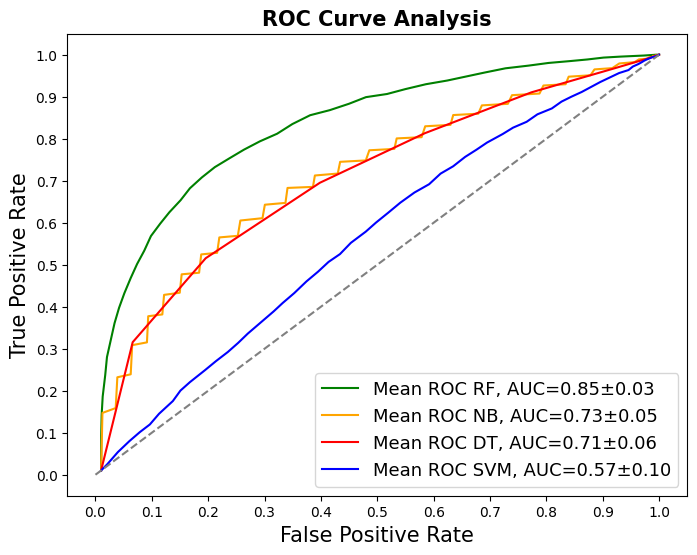

In [41]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(var_smoothing=1e-9),
               RandomForestClassifier(random_state=123),#,n_estimators=1000),#,n_estimators=100,class_weight="balanced"),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
##MUTUALINFO

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];
mean_tpr=[]

W_range = list(range(0, 100))
X_range = list(range(0, 400, 100))
Y_range = list(range(0, 100,1))
fc_merge=['PartialSpecificVolume', 'st7', 'Blosum4', 'at_hmoment_sheet', 't2', 'at_hmoment_alpha', 'PorcAromatic', 't3', 'DoubleBendPreference', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 'Blosum8', 'st3', 'MsWhim3', 'pKC', 'PorcAcidic', 'PorcSmall', 'MsWhim1', 'PorcCharged', 'PorcAliphatic', 'z5', 'PorcBasic', 'SurroundingHidrophobicity', 'PorcPolar', 'ExtendedStructurePreference', 'Blosum9', 'z1', 'ElectronicProperties', 'at_charge', 'PorcNonPolar', 'z3']
for cls in classifiers:
    print(cls)
    for i in W_range:
        fpr_all=[]
        tpr_all=[]
        df2=df.iloc[np.random.random_integers(256,4312,256),0:74] #0:62
        df3=df.iloc[0:256,0:74]
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc_merge]
        Y_r=df4.Class
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)#,random_state=123)
        model = cls.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        #Fpr.append(fpr)
        #Tpr.append(tpr)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

matrix2=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix2,axis=1)
std_tpr_svm = np.std(matrix2,axis=1)

matrix=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)
#print(mean_fpr_nb)
#print(std_fpr_nb)

matrix2=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_nb = np.mean(matrix2,axis=1)
std_tpr_nb = np.std(matrix2,axis=1)


matrix=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

matrix2=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix2,axis=1)
std_tpr_rf = np.std(matrix2,axis=1)

matrix=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

matrix2=np.zeros((200,100))
for i in np.arange(0,200,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 200: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix2,axis=1)
std_tpr_dt = np.std(matrix2,axis=1)
###########
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_MIXNegEpiScript-r256-256.png')
plt.show() 